# Bước 2: Phân tích dữ liệu

## Mục tiêu: Làm rõ mối quan hệ giữa các đối tượng thông qua biểu đồ, hình ảnh, ...


In [3]:
# Tương tự bài 1, ta có:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv("train.csv", index_col="PassengerId")

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]


def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")


convert_cat(train_df, features)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    category
 1   Name      891 non-null    object  
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Ticket    891 non-null    object  
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    category
 10  Survived  891 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Biểu thị mối quan hệ giữa Sex và Survived

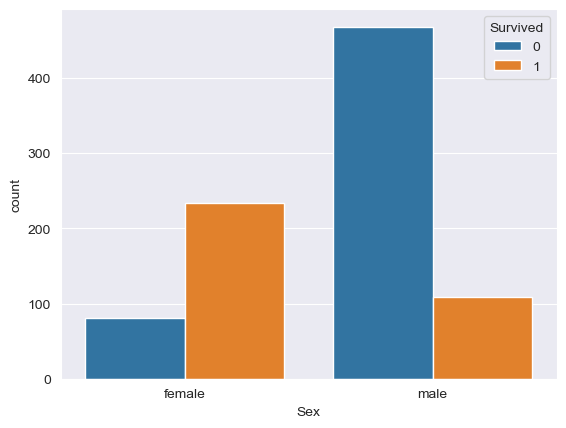

In [6]:
sns.countplot(data=train_df, x='Sex', hue="Survived");

### Ta thấy:
- Nam giới đi thuyền nhiều hơn nữ
- Tỉ lệ nam giới sống sót / nam giới chết là cao hơn tỉ lệ của nữ

### Tương tự ta có các mối quan hệ khác như sau

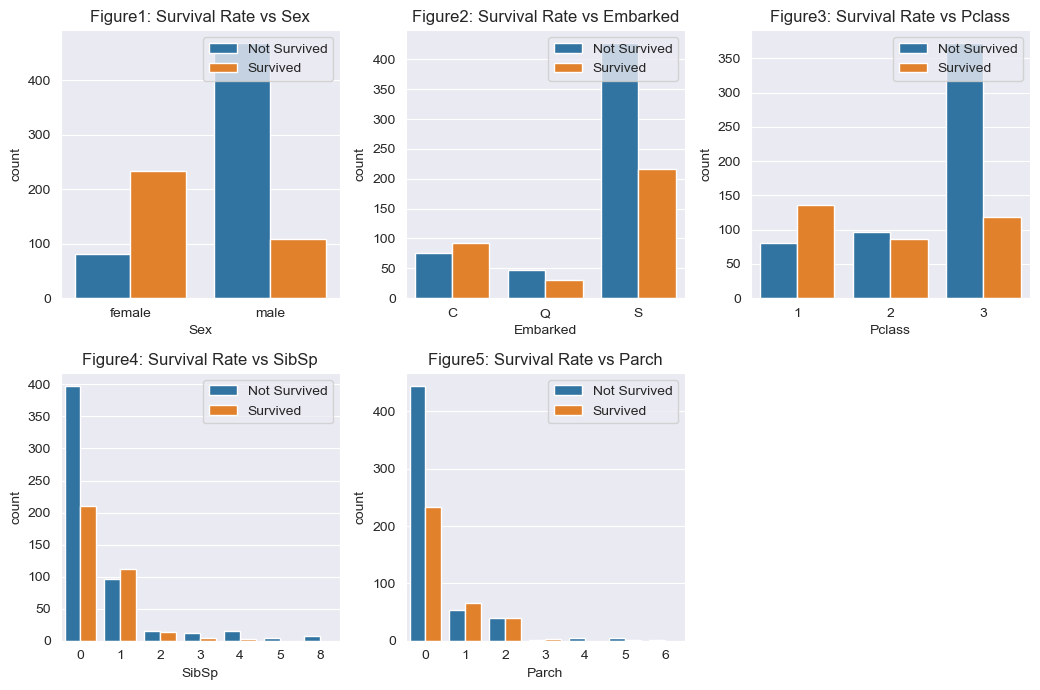

In [7]:
cols = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.5, n_rows * 3.5))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", ax=ax_i)
            ax_i.set_title(f"Figure{i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Nhận xét:
- Với Embarked:
    - Đa phần mọi người đều xuất phát từ S
    - Số người chết khi xuất phát từ S cũng như tỉ lệ chết khi xuất phát từ S là cao nhất.
- Với Pclass:
    - Hạng 3 (hạng phổ thông) có nhiều người đi nhất, và tỉ lệ người tử vong cũng cao nhất.
    - Hạng 1 có tỉ lệ người tử vong thấp nhất
- Tương tự với SibSp và Parch

### Với biểu diễn cho Numerical

<AxesSubplot:xlabel='Age', ylabel='Count'>

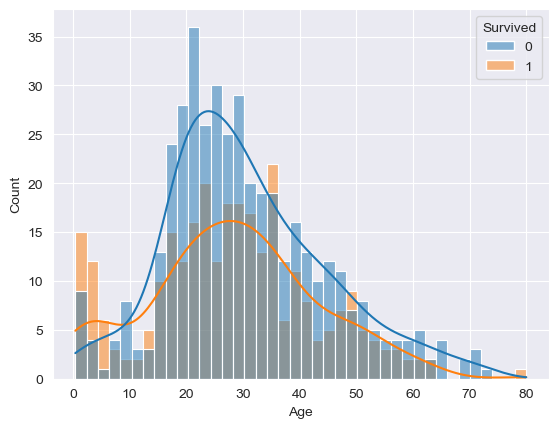

In [8]:
# So sánh giữa tuổi và tỉ lệ sống sót
sns.histplot(data=train_df, x='Age', hue='Survived', bins=40, kde=True)

### Ta thấy:
Tỉ lệ trẻ con sống sót cao hơn người lớn. Riêng có 1 vài độ tuổi cũng như vậy
Người cao tuổi nhất là 80 cũng sống sót

<AxesSubplot:xlabel='Fare', ylabel='Count'>

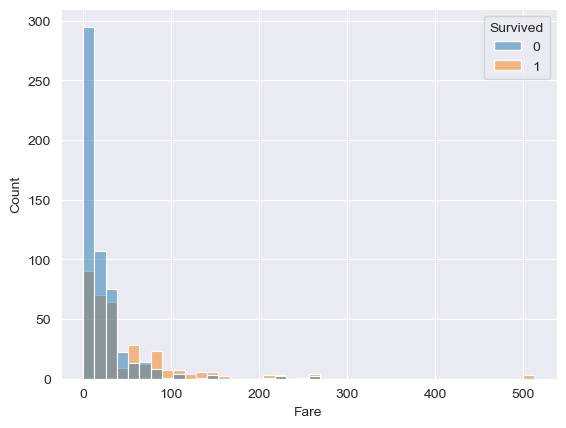

In [9]:
# Tương tự với Fare
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=40)

- Vì biểu đồ bị lệch hoàn toàn về phía trái (đa phần giá vé thấp), vì vậy chúng ta có thể làm như sau.

In [10]:
# Phân chia làm 4 hạng vé
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

<AxesSubplot:xlabel='Fare', ylabel='count'>

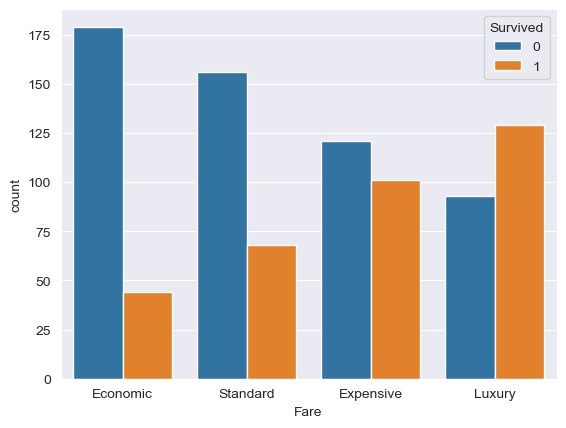

In [11]:
# Vẽ biểu đồ
sns.countplot(x=quartile_data, hue=train_df['Survived'])

### Ta thấy với giá vé càng cao, tỉ lệ tử vong càng thấp